In [67]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [68]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [69]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [72]:
x_test.shape

(10000, 28, 28)

In [73]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

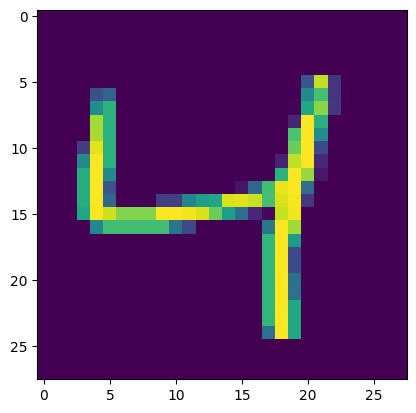

In [74]:
plt.imshow(x_train[2])

In [75]:
#IT is super important to convert the values of the image in some same range as it leads to early convergence of the model and accuracy increases

In [76]:
x_train = x_train /255.0
x_test = x_test / 255.0

In [77]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [78]:
# since we have the shape of input as 28*28 but we want only 1d data for the input layer, so we need to convert into a flatten layer using the flatten function from keras

In [79]:
model= Sequential()

model.add(Flatten(input_shape=(28,28))) #just mention the dimension of your data i.e 28 * 28
model.add(Dense(256,activation='relu')) #no need to mention the inputs as it will be imported from the flatten layer
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 32)                8224      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________


In [81]:
# while using "sparse_categorical_crossentropy", we need not to convert the data into one hot encoded format
# but while using "categorical_crossentropy" we need to convert the data into the one hot encoded format

In [82]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy']) 

In [83]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2) #selecting 20% rows from the training data just for validation

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2480 - accuracy: 0.9272 - val_loss: 0.1215 - val_accuracy: 0.9647
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0994 - accuracy: 0.9696 - val_loss: 0.0995 - val_accuracy: 0.9715
Epoch 3/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 4/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0868 - val_accuracy: 0.9744
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0948 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0987 - val_accuracy: 0.9739
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.1008 - val_accurac

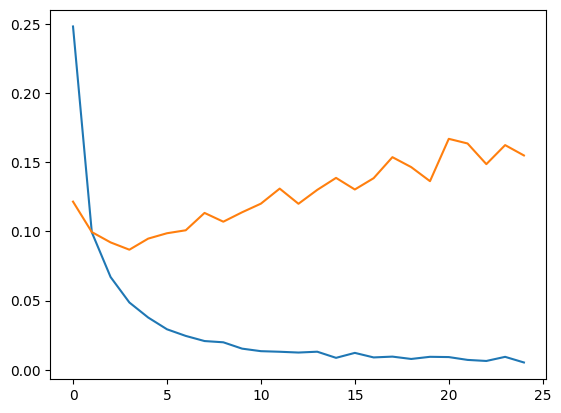

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

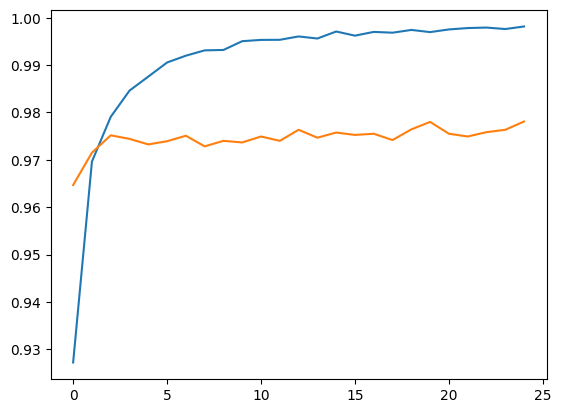

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [86]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [87]:
y_prob

array([[5.26803622e-18, 5.23756223e-13, 1.89788029e-11, ...,
        1.00000000e+00, 1.27427425e-14, 6.84492619e-15],
       [2.30687899e-15, 2.69860662e-10, 1.00000000e+00, ...,
        3.57309774e-24, 1.50887941e-19, 2.37797758e-35],
       [8.05533695e-10, 1.00000000e+00, 8.73806694e-10, ...,
        1.10804629e-11, 2.07107439e-11, 5.53169325e-17],
       ...,
       [2.37840149e-22, 5.12996478e-20, 9.12531758e-21, ...,
        2.65209245e-16, 8.33827419e-13, 2.14059151e-14],
       [3.74177821e-13, 3.36442971e-21, 1.29376386e-19, ...,
        2.46130015e-21, 6.82236259e-06, 2.13138635e-21],
       [2.38111776e-13, 1.32760101e-25, 4.51250754e-19, ...,
        5.35504210e-32, 4.07285784e-18, 5.06506824e-23]], dtype=float32)

In [88]:
y_pred = y_prob.argmax(axis=1)

In [89]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [90]:
accuracy_score(y_test,y_pred)

0.9798

In [92]:
print(x_train.shape[0])  # This should print 48000 if the above assumptions are correct


60000
